## Menyiapkan Dataset

In [6]:
# Import Pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
# Mengambilan data dari file csv
datasiswa = pd.read_csv('beasiswa.csv')
df = pd.DataFrame(datasiswa,columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)', 'Beasiswa/Tidak'])
X = np.asanyarray(datasiswa)
X_train = X[:,1:3]
y_train = X[:,3:4]

## Memanggil KNN Classifier

Melakukan prediksi dengan KNN classifier

In [13]:
# Memanggil KNN
knn = KNeighborsClassifier(n_neighbors=6,
                           weights='uniform',
                           algorithm='auto',
                           metric='euclidean')

# Fit model dgn data latih dan target/label
knn.fit(X_train,y_train)

c:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=6)

Dengan menggunakan data uji validati, model KNN dpt diketahui akurasinya. gunakan data yang lalu "validasibeasiswa.csv" untuk menguji akurasi model.

In [14]:
# Mengambil data dari file csv
datavalidasi = pd.read_csv('validasibeasiswa.csv')
df2 = pd.DataFrame(datasiswa, columns=['Mahasiswa','IPK','Tingkat Kemiskinan (TM)','Beasiswa/Tidak'])
X2 = np.asanyarray(datavalidasi)
X_val = X2[:,1:3]
y_val = X2[:,3:4]

# prediksi
y_pred = knn.predict(X_val)
print((y_val).T)
print("-"*55)
print(y_pred)
print("-"*55)
print(classification_report(y_val,y_pred))
print("-"*55)


[[0. 0. 0. 1. 1. 1. 1.]]
-------------------------------------------------------
[0. 0. 0. 1. 1. 1. 1.]
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

-------------------------------------------------------


## Pembuatan Grafi untuk Visualisasi

Langkah terakhir merupakan langkah tambahan yang berfungsi untuk manampilkan kelas hasil prediksi dalam bentuk grafik.

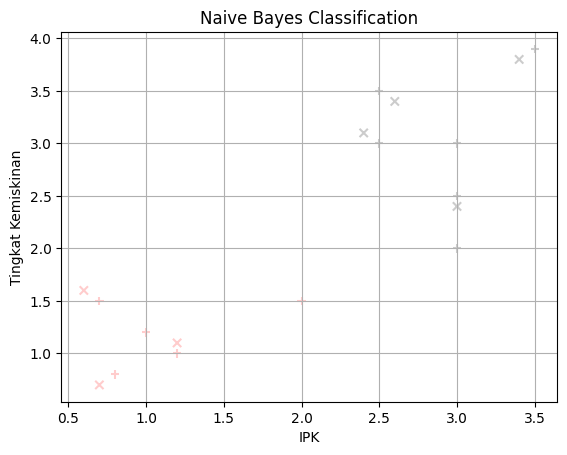

In [18]:
# Visualisasi Data

# plot Data Latih
absis = [X_train[:,0]]
ordinat = [X_train[:,1]]
target = [X[:,3]]
plt.scatter(absis, ordinat, alpha=0.2, c=target, cmap='flag', marker='+')

# Plot Data Uji
absis = [X_val[:,0]]
ordinat = [X_val[:,1]]
target = [X2[:,3]]
plt.scatter(absis, ordinat, alpha=0.2, c=target, cmap='flag', marker='x')

# Label
plt.xlabel("IPK")
plt.ylabel("Tingkat Kemiskinan")
plt.title("Naive Bayes Classification")
plt.grid()

Ada dua kumpulan data yang divisualisasikan dalam grafik. yang pertama diberi marker "+" merupakan data latih, sementara data hasil prediksi dgn marker "x". Pewarnaan mengunakan variabel "cmap" dgn parameter "flag" yang cocok untuk membedahkan dua jenis kelas merah dan biru.

Berikutnya kita uji dengan data sembarang misalnya IPK = 3.3 dan Tingkat kemiskinan = 1.5

In [19]:
data = [[3.3,1.5]]
prediksi = knn.predict(data)
print(prediksi)

[1.]


Perhatikan hasil menujukan data tersebut menghasilkan output "1" yang berarti "diterima".